**<h1>Статистический анализ данных сервиса аренды самокатов GoFast**

**Описание проекта**

Проанализируем данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки 
1. абонентская плата отсутствует;
2. стоимость одной минуты поездки — 8 рублей;
3. стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra 
1. абонентская плата — 199 рублей в месяц;
2. стоимость одной минуты поездки — 6 рублей;
3. стоимость старта — бесплатно.

**Цель проекта**

Провести статистический анализ данных, проверить гипотезы для роста бизнеса (сервиса аренды самокатов GoFast).

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

- user_id	- уникальный идентификатор пользователя
- name - имя пользователя
- age	- возраст
- city	- город
- subscription_type	- тип подписки (free, ultra)

Поездки — rides_go.csv
- user_id	- уникальный идентификатор пользователя
- distance	- расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	- дата совершения поездки

Подписки — subscriptions_go.csv
- subscription_type	- тип подписки
- minute_price	- стоимость одной минуты поездки по данной подписке
- start_ride_price	- стоимость начала поездки
- subscription_fee	- стоимость ежемесячного платежа

**План работы**
1. Загрузка данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Объединение данных;
5. Подсчёт выручки;
6. Проверка гипотез.

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

**1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.**

In [2]:
users_go=pd.read_csv('/datasets/users_go.csv')
rides_go=pd.read_csv('/datasets/rides_go.csv')
subscriptions_go=pd.read_csv('/datasets/subscriptions_go.csv')

**1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.**

In [3]:
display(users_go.head())
display(users_go.info())
display(users_go.duplicated().sum())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

31

In [4]:
display(rides_go.head())
display(rides_go.info())
display(rides_go.duplicated().sum())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

0

In [5]:
display(subscriptions_go.head())
display(subscriptions_go.info())
display(subscriptions_go.duplicated().sum())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

0

**Вывод:**

В результате изучения общей информации о данных, выяснили, что:

- users_go содержит 1565 строк, пропуски отсутствуют, количество явных дубликатов 31;

- rides_go содержит 18068 строк, пропуски отсутствуют, явных дубликатов нет;

- subscriptions_go содержит 2 строки, пропуски отсутствуют, явных дубликатов нет.

#### Шаг 2. Предобработка данных

**2.1 Приведем столбец date к типу даты pandas.**

In [6]:
rides_go['date']=pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

**2.2 Создадим новый столбец с номером месяца на основе столбца date.**

In [7]:
rides_go['month']=rides_go['date'].dt.month

**2.3 Удалим дубликаты, содержащиеся в users_go.**

In [8]:
users_go.drop_duplicates(inplace=True)


**Вывод:**

Выполнили предобработку данных, в результате которой:

- привели столбец date к типу даты pandas;

- создали новый столбец с номером месяца на основе столбца date;

- удалили строки дубликаты, содержащиеся в users_go.

#### Шаг 3. Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках:**

**3.1 Частота встречаемости городов**

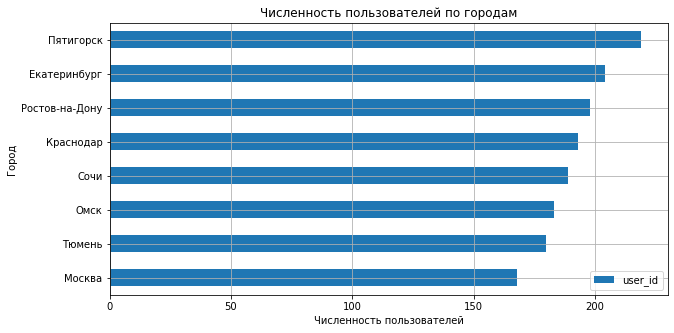

Численность пользователей в городах                 user_id
city                   
Пятигорск           219
Екатеринбург        204
Ростов-на-Дону      198
Краснодар           193
Сочи                189
Омск                183
Тюмень              180
Москва              168


In [9]:
users_go.pivot_table(index='city', values='user_id', aggfunc='count')\
.sort_values(by='user_id', ascending=True).plot(kind='barh', grid=True, figsize=(10,5));
plt.title('Численность пользователей по городам')
plt.ylabel('Город')
plt.xlabel('Численность пользователей') 
plt.show()
print('Численность пользователей в городах', users_go.pivot_table(index='city',\
values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False))


**Вывод:**

Лидером по количеству пользователей является город Пятигорск(219 пользователей), за ним следует Екатеринбург(204 пользователя), следом Ростов-на-Дону(198 пользователей), за ним Краснодар(193 пользователя) и Сочи(189 пользователей). Замыкают список городов по количетсву пользователей Омск(183 пользователя), Тюмень(180 пользователей) и Москва(168 пользователей).

**3.2 Соотношение пользователей с подпиской и без подписки**

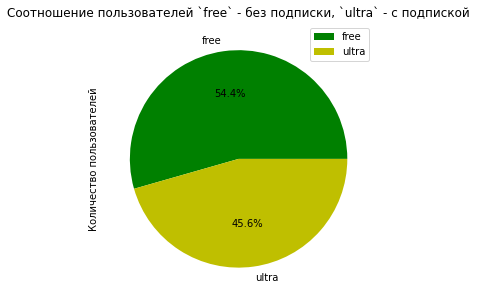

In [10]:
users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')\
.plot.pie(y='user_id', figsize=(5,5),  label='Количество пользователей', autopct='%1.1f%%', 
title='Соотношение пользователей `free` - без подписки, `ultra` - с подпиской', colors=('g', 'y'));

**Вывод:**

По круговой диаграмме видим, что количество пользователей без подписки составляет 54,4%, что больше чем пользователи с подпиской, на которых приходится 45,6%.

**3.3 Возраст пользователей**

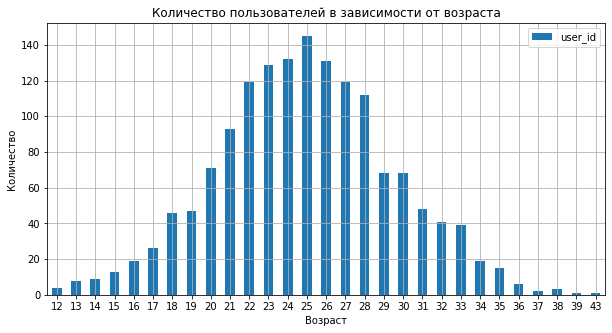

Среднее значение возраста пользователей 24.9


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [11]:
users_go.pivot_table(index='age', values='user_id', aggfunc='count')\
.sort_values(by='age', ascending=True).plot(kind='bar', grid=True, figsize=(10,5));
plt.title('Количество пользователей в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation = 0)
plt.show()
print('Среднее значение возраста пользователей', users_go['age'].mean().round(2))
users_go['age'].describe()

**Вывод:**

В результатее построенной диаграммы видим, что возраст пользователей распределён близко к нормальному, с медианой в 25 лет, что почти совпадает со средним значением возраста - 24.9. Первый квартиль находится на значении 22 года а третий квартиль на значении 28 лет. Таким образом, межквартильный размах составляет 8 лет.

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

In [12]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

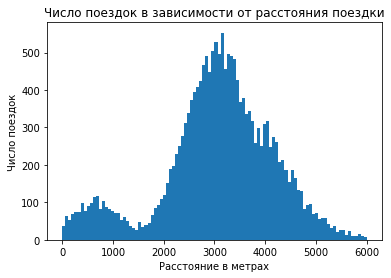

In [13]:
plt.hist(rides_go['distance'], bins=100, range=(1,6000));
plt.title('Число поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Число поездок')
plt.show()

**Вывод:**

Средняя дистанция, преодолеваемая пользователем за одну поездку составляет 3133 метра. На гистограмме видим основной 'холм', где среднее как раз составляет 3133 метра, а так же небольшой пик на 700 метрах. Первый квартиль принимает значение 2543,22 метра, третий квартиль - 3776,22 метра. Межквартильный размах составляет 1233 метра.

**3.5 Продолжительность поездок**

In [14]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

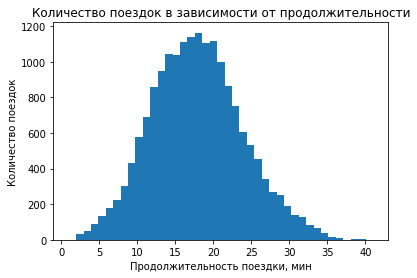

In [15]:
plt.hist(rides_go['duration'], bins=41, range=(1,41));
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество поездок')
plt.show()

**Вывод:**

Средняя продолжительность поездок составляет 18 минут, большинство пользователей тратят на поездку от 13 до 18 минут. Данные распределены близко к нормальному распределению. Первый квартиль принимает значение 13,6 минут, третий квартиль - 21,7 минут. Межквартильный размах составляет 8,1 мин.

**Провели исследовательский анализ данных, в результате которого выяснили:**

- Лидером по количеству пользователей является город Пятигорск(219 пользователей), за ним следует Екатеринбург(204 пользователя), следом Ростов-на-Дону(198 пользователей), за ним Краснодар(193 пользователя) и Сочи(189 пользователей). Замыкают список городов по количетсву пользователей Омск(183 пользователя), Тюмень(180 пользователей) и Москва(168 пользователей).

- По круговой диаграмме установили, что количество пользователей без подписки составляет 54,4%, что больше чем пользователи с подпиской, на которых приходится 45,6%.

- В результатее построенной диаграммы видим, что возраст пользователей распределён близко к нормальному, с медианой в 25 лет, что почти совпадает со средним значением возраста - 24.9. Первый квартиль находится на значении 22 года а третий квартиль на значении 28 лет. Таким образом, межквартильный размах составляет 8 лет.

- Средняя дистанция, преодолеваемая пользователем за одну поездку составляет 3133 метра. На гистограмме видим основной 'холм', где среднее как раз составляет 3133 метра, а так же небольшой пик на 700 метрах. Первый квартиль принимает значение 2543,22 метра, третий квартиль - 3776,22 метра. Межквартильный размах составляет 1233 метра.

- Средняя продолжительность поездок составляет 18 минут, большинство пользователей тратят на поездку от 13 до 18 минут. Данные распределены близко к нормальному распределению. Первый квартиль принимает значение 13,6 минут, третий квартиль - 21,7 минут. Межквартильный размах составляет 8,1 мин.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
        
Межквартильный размах является мерой разброса данных, которая особенно полезна в анализе из-за следующих преимуществ:
        
1. Устойчивость к выбросам. В отличие от среднего арифметического, межквартильный размах менее чувствителен к выбросам в данных. Это делает его более надежной мерой разброса по сравнению со средним арифметическим, особенно в случаях, когда данные содержат необычные значения или аномалии.
2. Простота понимания и интерпретации. Межквартильный диапазон легко понять и интерпретировать, так как он показывает расстояние между 25% наименьших и 25% наибольших значений в наборе данных.
3. Разделение среднего и дисперсии. Межквартильный размах отделяет среднее значение от дисперсии, что может быть полезно для анализа данных, так как позволяет изучать эти два аспекта отдельно.
4. Более высокая эффективность в некоторых случаях. В некоторых ситуациях использование межквартильного диапазона вместо среднего арифметического может быть более эффективным, например, при анализе данных с тяжелыми хвостами распределения или асимметричными        
        
В маркетинге межквартильный размах может использоваться для анализа следующих аспектов:
        
1. Поведение пользователей: IQR может помочь маркетологам определить, как пользователи взаимодействуют с продуктом или услугой, например, как часто они используют продукт, на какие функции они чаще всего нажимают и т.д.
2. Эффективность рекламы: IQR можно использовать для анализа эффективности рекламных кампаний, чтобы определить, какие рекламные сообщения привлекают наибольшее внимание и какие не вызывают интереса у аудитории.        

#### Шаг 4. Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().**

In [16]:
data=users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')
data.head()


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> На этих данных — объединение прошло по плану.
         
        
        
Обрати внимание на параметры, которые пандас выставляет по умолчанию при merge (для справки в join такая же «засада» по характеру, но другая по исполнению)
        
Использование параметров по умолчанию может привести к потере данных при объединении        
     
        
[Примеры объединения таблиц, merge](https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge)  
        
[Примеры объединения таблиц, join](https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)          

In [17]:
print("Количество строк (поездок) в 'rides_go':", rides_go['user_id'].count())
print("Количество строк (поездок) в 'data':", data['user_id'].count())
print("Количество пользователей в 'users_go':", len(users_go['user_id'].unique()))
print("Количество пользователей в 'data':", len(data['user_id'].unique()))
data.isnull().sum().sum()

Количество строк (поездок) в 'rides_go': 18068
Количество строк (поездок) в 'data': 18068
Количество пользователей в 'users_go': 1534
Количество пользователей в 'data': 1534


0

**Размерность до объединения и после у полученной таблицы соответствуют, пропущенные значения после объединения отсутствуют.**

**4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:**

**- c данными о пользователях без подписки**

In [18]:
data_free=data[data['subscription_type']=='free']
if (data_free.isnull().sum().sum()) == 0:
    print('Пропуски отсутствуют')
else:
    print('Внимание! Пропуски!')

Пропуски отсутствуют


**- c данными о пользователях c подпиской**

In [19]:
data_ultra=data[data['subscription_type']=='ultra']
if (data_ultra.isnull().sum().sum()) == 0:
    print('Пропуски отсутствуют')
else:
    print('Внимание! Пропуски!')

Пропуски отсутствуют


In [20]:
if len(data) == (len(data_free) + len(data_ultra)):
    print('Размерность таблиц совпадает')
else:
    print('Размерность таблиц не совпадает')

Размерность таблиц совпадает


**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

In [21]:
data_free['distance'].describe().round(2)

count    11568.00
mean      3045.50
std       1246.17
min          0.86
25%       2366.56
50%       3114.65
75%       3905.70
max       7211.01
Name: distance, dtype: float64

In [22]:
data_ultra['distance'].describe().round(2)

count    6500.00
mean     3115.45
std       836.90
min       244.21
25%      2785.44
50%      3148.64
75%      3560.57
max      5699.77
Name: distance, dtype: float64

In [23]:
data_free['duration'].describe().round(2)

count    11568.00
mean        17.39
std          6.33
min          0.50
25%         12.96
50%         17.33
75%         21.59
max         34.95
Name: duration, dtype: float64

In [24]:
data_ultra['duration'].describe().round(2)

count    6500.00
mean       18.54
std         5.57
min         3.76
25%        14.52
50%        18.18
75%        21.88
max        40.82
Name: duration, dtype: float64

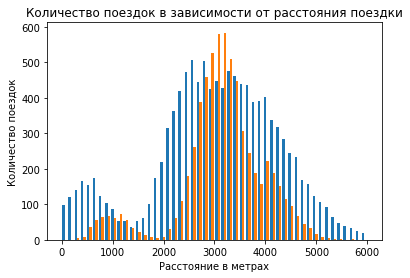

In [25]:
plt.hist([data_free['distance'], data_ultra['distance']], bins=50, range=(1,6000));
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

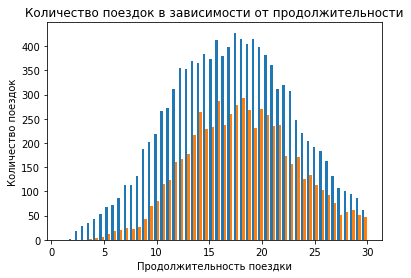

In [26]:
plt.hist([data_free['duration'], data_ultra['duration']], bins=50, range=(1,30));
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

**В результате объединения данных получили:**

Визуализация созданных датафреймов показывает, что подписка пользователей оказывает влияние на расстояние и время
поездок, однако незначительно, поскольку с подпиской среднее время 18 минут и расстояние 3148 метров, а без подписки 17 минут и 3114 метров соответственно.


#### Шаг 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [27]:
data['duration'] = np.ceil(data['duration'])

In [28]:
data_general = data.pivot_table(index=('user_id', 'month'), values=('distance', 'duration', \
'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type'),\
aggfunc=({'distance':{'count','sum'}, 'duration':'sum', \
'minute_price':'mean', 'start_ride_price':'mean', 'subscription_fee':'mean',\
'subscription_type':'min'}))
data_general.columns = ['count', 'distance', 'duration', 'minute_price','start_ride_price', \
'subscription_fee', 'subscription_type']
data_general.head()



count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra

In [29]:
data_general.isnull().sum()

count                0
distance             0
duration             0
minute_price         0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

Пропущенные значения отсутствуют

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
👍

**5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Посчитаем общую выручку.**

In [30]:
data_general['revenue'] = (data_general['start_ride_price'] * data_general['count'] + 
                           data_general['minute_price'] * data_general['duration'] + 
                           data_general['subscription_fee'])
print('Итого выручка составила:', data_general['revenue'].sum(), 'руб')

Итого выручка составила: 3878641.0 руб


In [31]:
data_general.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee subscription_type  revenue  
user_id month                                               
1       1                   199             ultra    451.0  
        4                   199             ultra    241.0  
        8                   199             ultra    475.0  
        10                  199             ultra    391.0  
        11                  199             ultra    535.0

**Посчитаем выручку компании за весь период от пользователей без подписки и с подпиской.** 

In [32]:
data_general_free = data_general[data_general['subscription_type']=='free']
print('Итого выручка от пользователей без подписки составила:', data_general_free['revenue'].sum(), 'руб')
data_general_ultra = data_general[data_general['subscription_type']=='ultra']
print('Итого выручка от пользователей c подпиской составила:', data_general_ultra['revenue'].sum(), 'руб')


Итого выручка от пользователей без подписки составила: 2234104.0 руб
Итого выручка от пользователей c подпиской составила: 1644537.0 руб


**Посчитаем среднемесячную выручку компании от одного пользователя без подписки и с подпиской.**

In [33]:
data_general_free['revenue'].describe()

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: revenue, dtype: float64

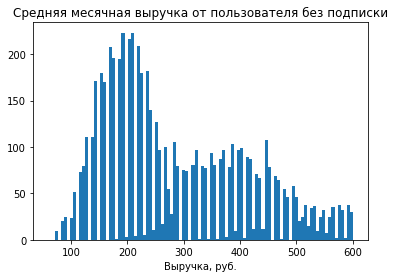

In [34]:
plt.hist(data_general_free['revenue'], bins=100, range=(60,600));
plt.title('Средняя месячная выручка от пользователя без подписки')
plt.xlabel('Выручка, руб.')
plt.show()

In [35]:
data_general_ultra['revenue'].describe()

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: revenue, dtype: float64

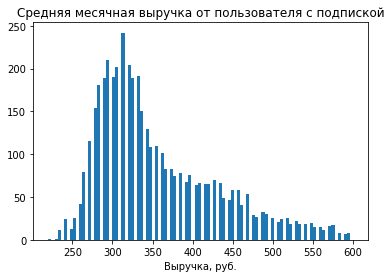

In [36]:
plt.hist(data_general_ultra['revenue'], bins=100, range=(220,600));
plt.title('Средняя месячная выручка от пользователя c подпиской')
plt.xlabel('Выручка, руб.')
plt.show()

**Итого среднемесячная выручка от пользователя без подписки составляет 274 рубля, а среднемесячная выручка пользователя с подпиской выше и составляет 337 рублей.**

**Вывод:**
Для подсчёта выручки создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединенными данными, нашли суммарное расстояние, количество поездок и суммаарное время для каждого пользователя за каждый месяц, затем добавили столбец с помесячной выручкой, которую принес каждый пользователь. Итоговая выручка составила 3878641,0 руб. При этом выручка от пользователей без подписки больше выручки от пользователей с подпиской (2234104 руб и 1644537 руб соотвестственно). Cреднемесячная выручка от одного пользователя без подписки составила: 274 руб, среднемесячная выручка от одного пользователя с подпиской составила: 337 руб. Данные свидетельствует о том, что компании необходимо наращивать число пользователей с подпиской, чтобы увеличить выручку. 

#### Шаг 6. Проверка гипотез

**6.1 Определим, тратят ли пользователи с подпиской больше времени на поездки?**

Выдвинем гипотезы: 

- H0: Средняя продолжительность поездок с подпиской и без равна;

- H1: Средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки.

Проверим гипотезы, используя исходные данные о продолжительности каждой сессии.

In [37]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=True, alternative='greater')
print('p-значение:', results.pvalue)
alpha = 0.01
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:**

Нулевая гипотеза отвергнута, следовательно средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки. Таким образом, пользователи с подпиской могут быть «выгоднее» для компании, следовательно компании необходимо увеличивать число пользователей с подпиской.

Вероятность получить наблюдаемое или ещё более далёкое от предполагаемого в H0 значения при условии, что H0 верна. Так как получившееся значение p-value — меньше выбранного уровня значимости — то наблюдаемое значение очень маловероятно при такой нулевой гипотезе, и мы отвергаем её в пользу альтернативной.

**6.2 Определим, является ли расстояние, не превышающее 3130 метров, средним расстоянием, которое проезжают пользователи с подпиской за одну поездку?**

Выдвинем гипотезы: 

- H0: Среднее расстояние поездок с подпиской равно оптимальному расстоянию в 3130 метров;

- H1: Среднее расстояние поездок с подпиской больше оптимального расстояния в 3130 метров.

Проверим гипотезы, используя исходные данные о расстоянии для клиентов с подпиской.

In [38]:
distance = 3130
alpha = 0.01
results = st.ttest_1samp(data_ultra['distance'], distance, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Нулевую гипотезу не получилось отвергнуть, соответственно есть основания полагать, что что среднее расстояние поездки клиентов с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката. Следовательно компании выгодно привлекать к сервису новых клиентов с подпиской, чтобы увеличить показатели по выручке.

**6.3 Выясним, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Выдвинем гипотезы: 

- H0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки;

- H1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

Проверим гипотезы, используя исходные данные о расстоянии для клиентов с подпиской.

In [39]:
results = st.ttest_ind(data_general.loc[data_general['subscription_fee'] > 0, 'revenue'], 
          data_general.loc[data_general['subscription_fee'] == 0, 'revenue'], 
          equal_var=True, alternative='greater')
print('p-значение:', results.pvalue)
alpha = 0.01
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:**

Нулевая гипотеза отвергнута, следовательно есть основания полагать, что помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки. Все исследуемые гипотезы 'говорят' о том, что компании необходимо увеличивать число клиентов с подпиской.

**6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Ответим на вопрос: "Какой тест нам понадобился бы для проверки этой гипотезы?"**

Ситуация подразумевает собой проверку гипотезы для одной генеральной совокупности, с которой произошли некоторые изменения. Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем примере это количество обращений — до обновления и после него.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel(). Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения. Если указать alternative='greater', проверится правосторонняя альтернативная гипотеза. Необходимый тест:  st.ttest_rel(before, after, alternative=’greater’).

**Вывод по разделу проверка гипотез:**

- Нулевая гипотеза отвергнута, следовательно средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки. Таким образом, пользователи с подпиской могут быть «выгоднее» для компании, следовательно компании необходимо увеличивать число пользователей с подпиской.;

- Нулевую гипотезу не получилось отвергнуть, соответственно есть основания полагать, что что среднее расстояние поездки клиентов с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката. Следовательно компании выгодно привлекать к сервису новых клиентов с подпиской, чтобы увеличить показатели по выручке.;

- Нулевая гипотеза отвергнута, следовательно есть основания полагать, что помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки. Все исследуемые гипотезы 'говорят' о том, что компании необходимо увеличивать число клиентов с подпиской.;

- Рассмотрена ситуация с проверкой гипотезы для одной генеральной совокупности, с которой произошли некоторые изменения. Дано предположение о необходимости использовать метод scipy.stats.ttest_rel() с аргументом alternative='greater'.

**Общий вывод по проекту:**


В ходе проведённого исследования было выполнено:

1. В результате изучения общей информации о данных, выяснили, что:

- users_go содержит 1565 строк, пропуски отсутствуют, количество явных дубликатов 31;

- rides_go содержит 18068 строк, пропуски отсутствуют, явных дубликатов нет;

- subscriptions_go содержит 2 строки, пропуски отсутствуют, явных дубликатов нет.

2. Выполнили предобработку данных, в результате которой:

- привели столбец date к типу даты pandas;

- создали новый столбец с номером месяца на основе столбца date;

- удалили строки дубликаты, содержащиеся в users_go.

3. Провели исследовательский анализ данных, в результате которого выяснили:

- Лидером по количеству пользователей является город Пятигорск(219 пользователей), за ним следует Екатеринбург(204 пользователя), следом Ростов-на-Дону(198 пользователей), за ним Краснодар(193 пользователя) и Сочи(189 пользователей). Замыкают список городов по количетсву пользователей Омск(183 пользователя), Тюмень(180 пользователей) и Москва(168 пользователей).

- По круговой диаграмме установили, что количество пользователей без подписки составляет 54,4%, что больше чем пользователи с подпиской, на которых приходится 45,6%.

- В результатее построенной диаграммы видим, что возраст пользователей распределён близко к нормальному, с медианой в 25 лет, что почти совпадает со средним значением возраста - 24.9. Первый квартиль находится на значении 22 года а третий квартиль на значении 28 лет. Таким образом, межквартильный размах составляет 8 лет.

- Средняя дистанция, преодолеваемая пользователем за одну поездку составляет 3133 метра. На гистограмме видим основной 'холм', где среднее как раз составляет 3133 метра, а так же небольшой пик на 700 метрах. Первый квартиль принимает значение 2543,22 метра, третий квартиль - 3776,22 метра. Межквартильный размах составляет 1233 метра.

- Средняя продолжительность поездок составляет 18 минут, большинство пользователей тратят на поездку от 13 до 18 минут. Данные распределены близко к нормальному распределению. Первый квартиль принимает значение 13,6 минут, третий квартиль - 21,7 минут. Межквартильный размах составляет 8,1 мин.

4. В результате объединения данных получили:

- Визуализация созданных датафреймов показывает, что подписка пользователей оказывает влияние на расстояние и время поездок, однако незначительно, поскольку с подпиской среднее время 18 минут и расстояние 3148 метров, а без подписки 17 минут и 3114 метров соответственно.

5. Итоговая выручка составила 3878641,0 руб. При этом выручка от пользователей без подписки больше выручки от пользователей с подпиской (2234104 руб и 1644537 руб соотвестственно). Cреднемесячная выручка от одного пользователя без подписки составила: 274 руб, среднемесячная выручка от одного пользователя с подпиской составила: 337 руб. Данные свидетельствует о том, что компании необходимо наращивать число пользователей с подпиской, чтобы увеличить выручку. 

6. Проверили гипотезы по рассмотренным примерам:

- Нулевая гипотеза отвергнута, следовательно средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки. Таким образом, пользователи с подпиской могут быть «выгоднее» для компании, следовательно компании необходимо увеличивать число пользователей с подпиской.;

- Нулевую гипотезу не получилось отвергнуть, соответственно есть основания полагать, что что среднее расстояние поездки клиентов с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката. Следовательно компании выгодно привлекать к сервису новых клиентов с подпиской, чтобы увеличить показатели по выручке.;

- Нулевая гипотеза отвергнута, следовательно есть основания полагать, что помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки. Все исследуемые гипотезы 'говорят' о том, что компании необходимо увеличивать число клиентов с подпиской.;

- Рассмотрена ситуация с проверкой гипотезы для одной генеральной совокупности, с которой произошли некоторые изменения. Дано предположение о необходимости использовать метод scipy.stats.ttest_rel() с аргументом alternative='greater'.


**Итоговая рекомендация для бизнеса**
- Сервису аренды самокатов GoFast необходимо предпринимать действия для увеличения числа пользователей с подпиской, так как исследование показало, что клиенты не стремятся оформить подписку и за данный период пользователи без подписки приносят большую выручку. Поэтому рекомендую проведение акций, возможно пересмотра тарифов для того, чтобы увеличить выручку компании за счёт увеличения числа клиентов с подпиской.